# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 124)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,DAYS_BRITH_YEAR_CUT
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,"(25.378, 27.808]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(44.819, 47.249]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(52.11, 54.54]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,"(49.679, 52.11]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(54.54, 56.97]"


In [8]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [9]:
app_train["DAYS_BIRTH"] = app_train['DAYS_BIRTH'] / 365
app_train["DAYS_BRITH_YEAR_CUT"] = pd.cut(app_train['DAYS_BIRTH'] , 20)
app_train["DAYS_BRITH_YEAR_CUT"]

0         (0.0695, 0.0762]
1           (0.123, 0.129]
2           (0.143, 0.149]
3           (0.136, 0.143]
4           (0.149, 0.156]
5           (0.123, 0.129]
6           (0.103, 0.109]
7           (0.136, 0.143]
8           (0.149, 0.156]
9           (0.103, 0.109]
10        (0.0762, 0.0828]
11          (0.149, 0.156]
12         (0.0962, 0.103]
13          (0.103, 0.109]
14          (0.103, 0.109]
15        (0.0629, 0.0695]
16         (0.0962, 0.103]
17        (0.0695, 0.0762]
18          (0.129, 0.136]
19        (0.0828, 0.0895]
20          (0.136, 0.143]
21          (0.109, 0.116]
22        (0.0828, 0.0895]
23          (0.183, 0.189]
24        (0.0828, 0.0895]
25          (0.143, 0.149]
26          (0.136, 0.143]
27          (0.116, 0.123]
28        (0.0695, 0.0762]
29        (0.0762, 0.0828]
                ...       
307481      (0.149, 0.156]
307482      (0.103, 0.109]
307483      (0.183, 0.189]
307484     (0.0962, 0.103]
307485    (0.0895, 0.0962]
307486      (0.116, 0.123]
3

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


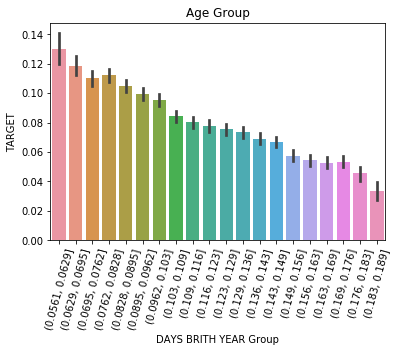

In [10]:
import seaborn as sns
px = app_train["DAYS_BRITH_YEAR_CUT"]
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('DAYS BRITH YEAR Group'); plt.ylabel('TARGET')
plt.title('Age Group');